In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/informativeness_dataset_new.csv')

In [4]:
df

review_sent_id  action_point_bin  sentiment_bin  \
0       ICLR2022--70L8lpp9DF-R1.txt_sent_0               1.0            0.0   
1       ICLR2022--70L8lpp9DF-R1.txt_sent_1               1.0            0.0   
2       ICLR2022--70L8lpp9DF-R1.txt_sent_2               1.0            0.0   
3       ICLR2022--70L8lpp9DF-R1.txt_sent_3               1.0            0.0   
4       ICLR2022--70L8lpp9DF-R1.txt_sent_4               1.0            0.0   
...                                    ...               ...            ...   
49015  ICLR2022-XHUxf5aRB3s-R4.txt_sent_10               1.0            0.0   
49016  ICLR2022-XHUxf5aRB3s-R4.txt_sent_11               1.0            0.0   
49017  ICLR2022-XHUxf5aRB3s-R4.txt_sent_12               1.0            0.0   
49018  ICLR2022-XHUxf5aRB3s-R4.txt_sent_13               1.0            0.0   
49019  ICLR2022-XHUxf5aRB3s-R4.txt_sent_14               1.0            0.0   

       hedge_detection_bin  cosine_sim  jaccard_sim  avg_syllable_count  \
0                      0.0    0.702043     0.100291            0.103970   
1                      0.0    0.644956     0.136109            0.117057   
2                      0.0    0.523631     0.136064            0.056361   
3                      0.0    0.523525     0.107526            0.062112   
4                      0.0    0.691643     0.206993            0.069565   
...                    ...         ...          ...                 ...   
49015                  0.0    0.280989     0.031322            0.117057   
49016                  0.0    0.425032     0.087650            0.210598   
49017                  0.0    0.403290     0.050028            0.170132   
49018                  0.0    0.264477     0.068967            0.080092   
49019                  0.0    0.026200     0.018820            0.108696   

       avg_word_length  avg_sent_length_by_word  count_functional_words  ...  \
0             0.273585                 0.027933                0.326087  ...   
1             0.298349                 0.032123                0.528846  ...   
2             0.194340                 0.033520                0.416667  ...   
3             0.256604                 0.025140                0.416667  ...   
4             0.264690                 0.065642                0.450000  ...   
...                ...                      ...                     ...  ...   
49015         0.236575                 0.013966                0.192308  ...   
49016         0.372075                 0.040503                0.195312  ...   
49017         0.364780                 0.027933                0.271739  ...   
49018         0.330189                 0.022346                0.592105  ...   
49019         0.372642                 0.004190                0.000000  ...   

          mattr  simpsond  sentiment_confidence  sarcasm_score_bin  \
0      0.939394  0.144928              0.395584                  0   
1      1.000000  0.036923              0.094971                  0   
2      1.000000  0.011396              0.014322                  0   
3      1.000000  0.034632              0.170780                  0   
4      1.000000  0.023222              0.327172                  0   
...         ...       ...                   ...                ...   
49015  1.000000  0.000000              0.357976                  0   
49016  1.000000  0.078431              0.594335                  0   
49017  1.000000  0.013333              0.509339                  0   
49018  1.000000  0.070175              0.642236                  0   
49019  1.000000  0.000000              0.561156                  0   

       Informativeness_PCA_1  Informativeness_PCA_2  Informativeness_PCA_3  \
0                   2.081727              -3.842103               0.987148   
1                   0.158470              -0.098668              -1.692546   
2                  -1.532578              -0.285254              -2.272959   
3                  -1.042247              -0.833925             

In [6]:
df.columns

Index(['review_sent_id', 'action_point_bin', 'sentiment_bin',
       'hedge_detection_bin', 'cosine_sim', 'jaccard_sim',
       'avg_syllable_count', 'avg_word_length', 'avg_sent_length_by_word',
       'count_functional_words', 'punctuation_count_ratio', 'flesch',
       'kincaid', 'gunning_fox', 'dale_chall', 'yulek', 'herdan', 'maas',
       'msttr', 'mattr', 'simpsond', 'sentiment_confidence',
       'sarcasm_score_bin', 'Informativeness_PCA_1', 'Informativeness_PCA_2',
       'Informativeness_PCA_3', 'Informativeness_UMAP',
       'Informativeness_IsolationForest', 'Informativeness_Autoencoder'],
      dtype='object')

In [7]:
features = df.columns[1:23]
targets = df.columns[23:]

In [9]:
print(features)
print(targets)

Index(['action_point_bin', 'sentiment_bin', 'hedge_detection_bin',
       'cosine_sim', 'jaccard_sim', 'avg_syllable_count', 'avg_word_length',
       'avg_sent_length_by_word', 'count_functional_words',
       'punctuation_count_ratio', 'flesch', 'kincaid', 'gunning_fox',
       'dale_chall', 'yulek', 'herdan', 'maas', 'msttr', 'mattr', 'simpsond',
       'sentiment_confidence', 'sarcasm_score_bin'],
      dtype='object')
Index(['Informativeness_PCA_1', 'Informativeness_PCA_2',
       'Informativeness_PCA_3', 'Informativeness_UMAP',
       'Informativeness_IsolationForest', 'Informativeness_Autoencoder'],
      dtype='object')


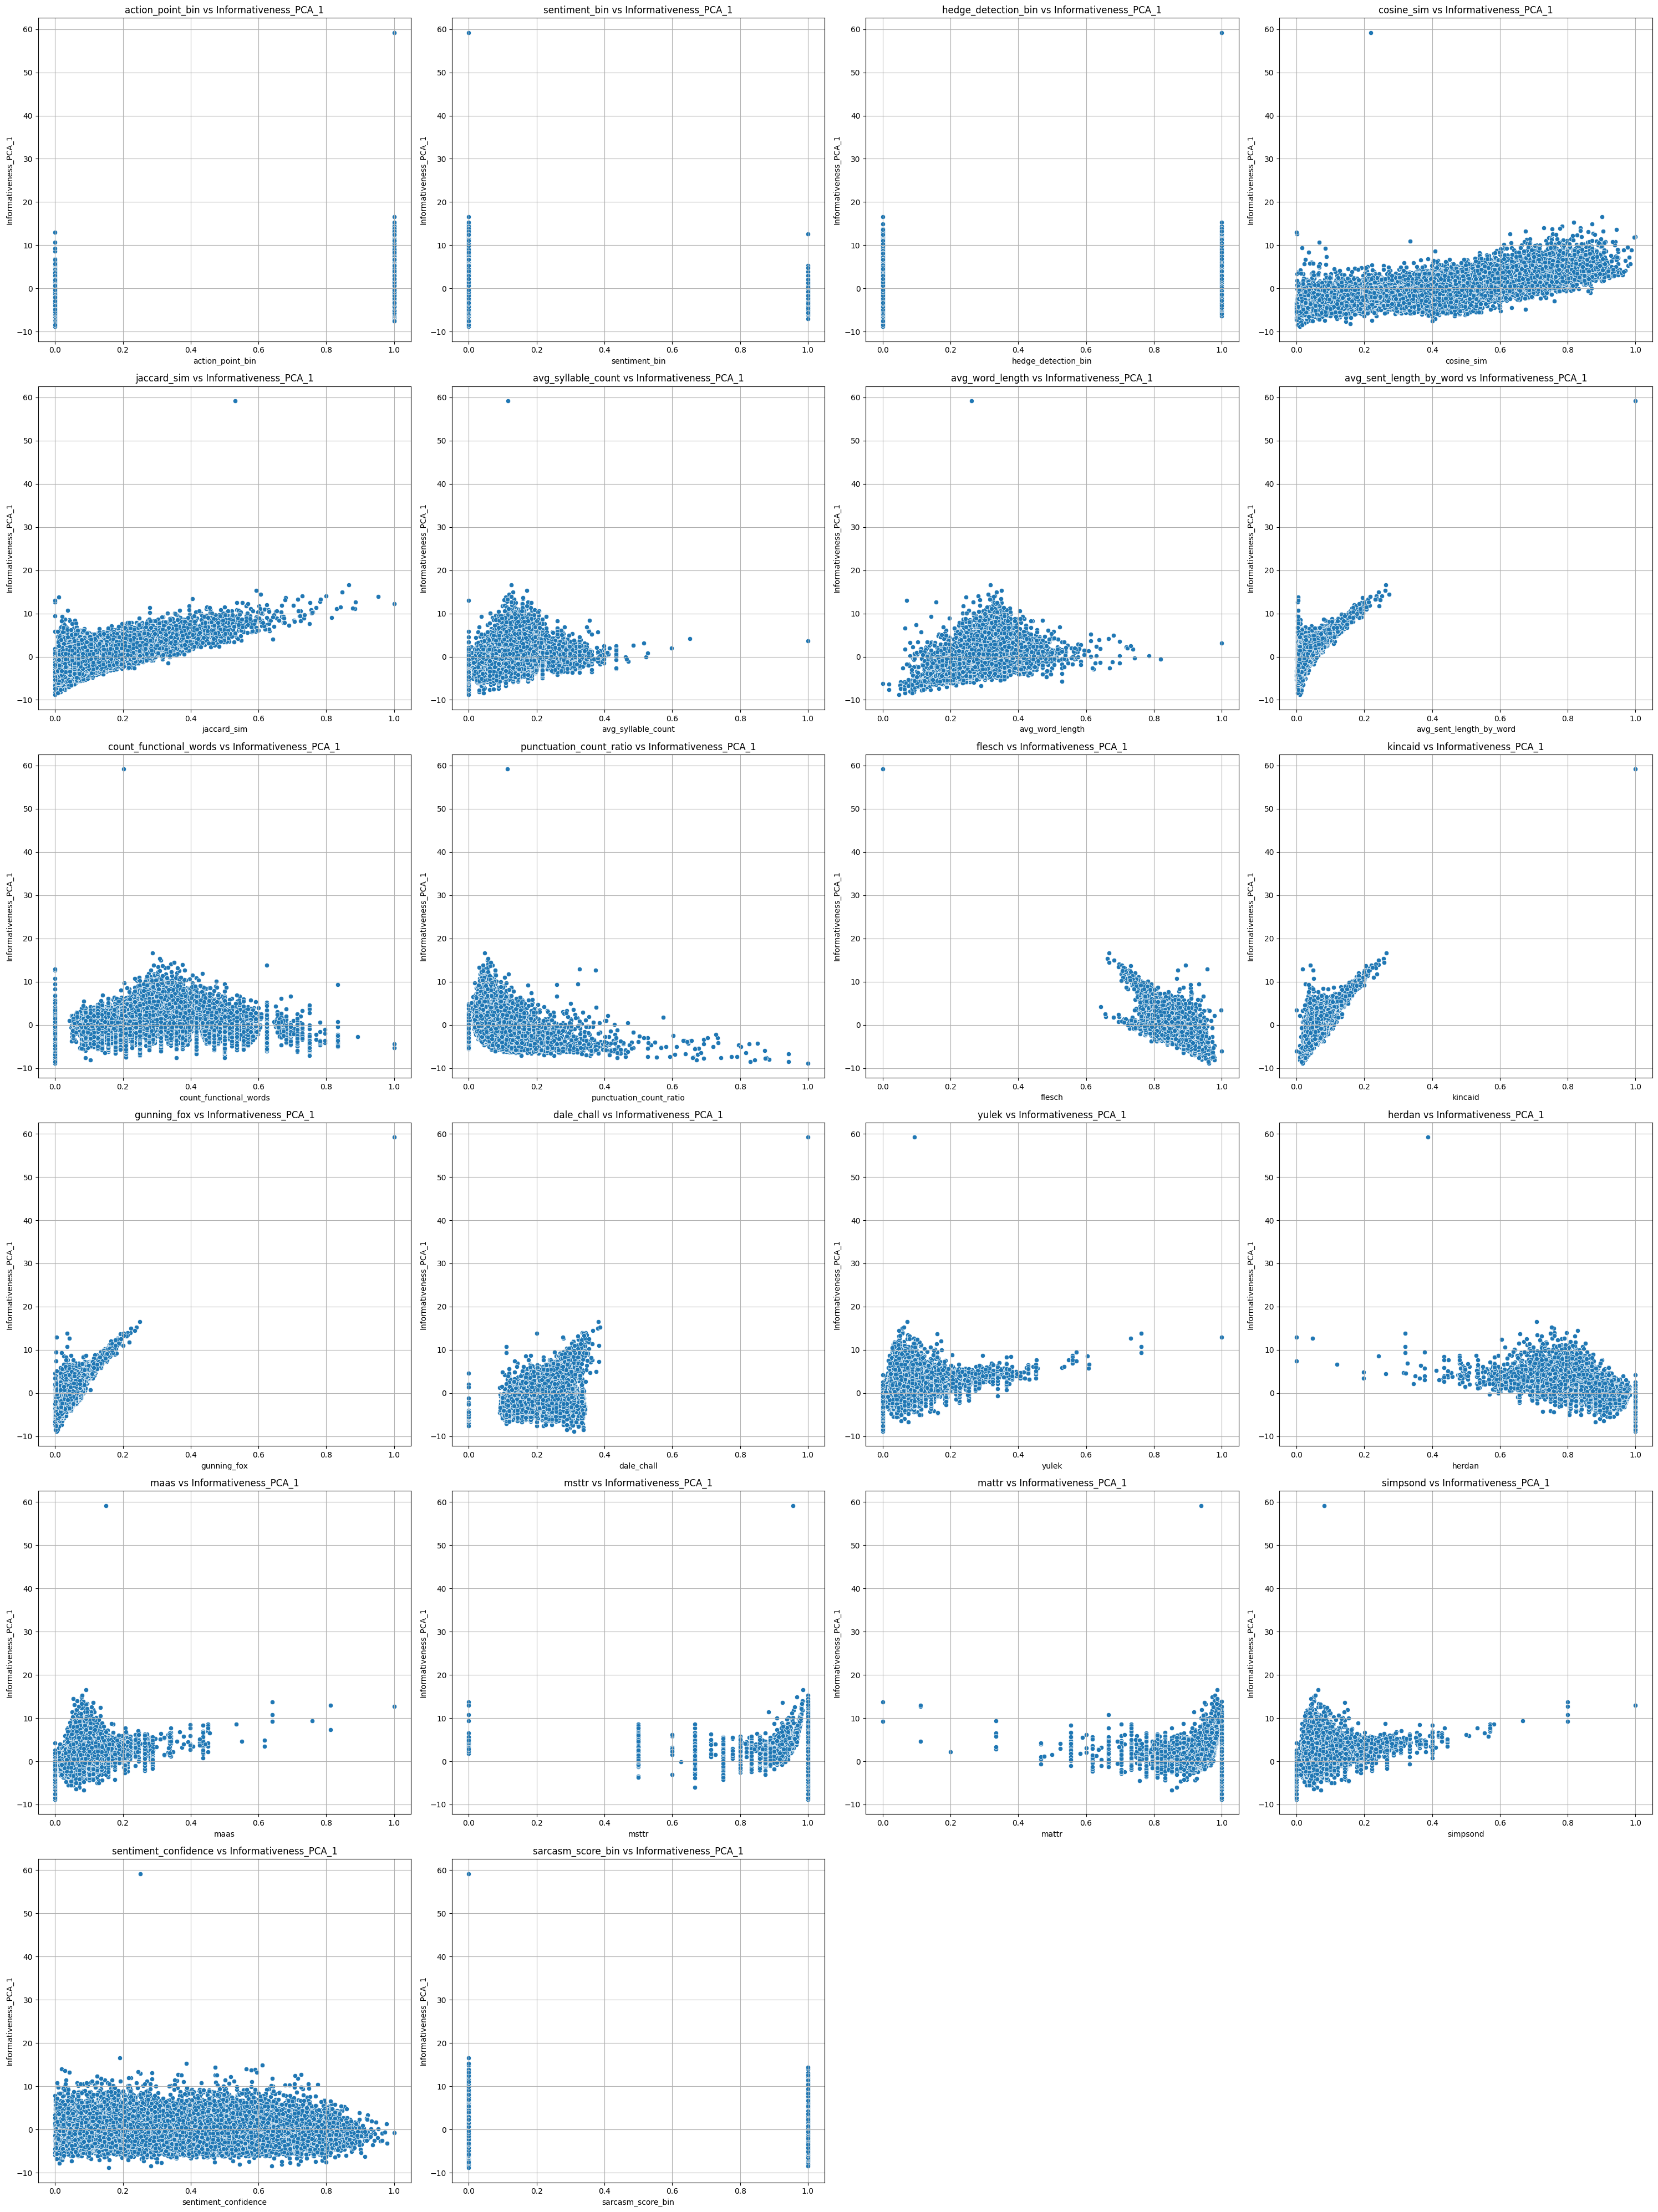

In [28]:
plt.figure(figsize=(30, 40))  # Adjust size for better visualization
for idx, feature in enumerate(features):
    plt.subplot(6, 4, idx + 1)  # 11 rows, 2 columns grid
    sns.scatterplot(data=df, x=feature, y=targets[0])
    plt.title(f'{feature} vs {targets[0]}')
    plt.xlabel(feature)
    plt.ylabel(targets[0])
    plt.grid(True)
plt.tight_layout()
plt.show()

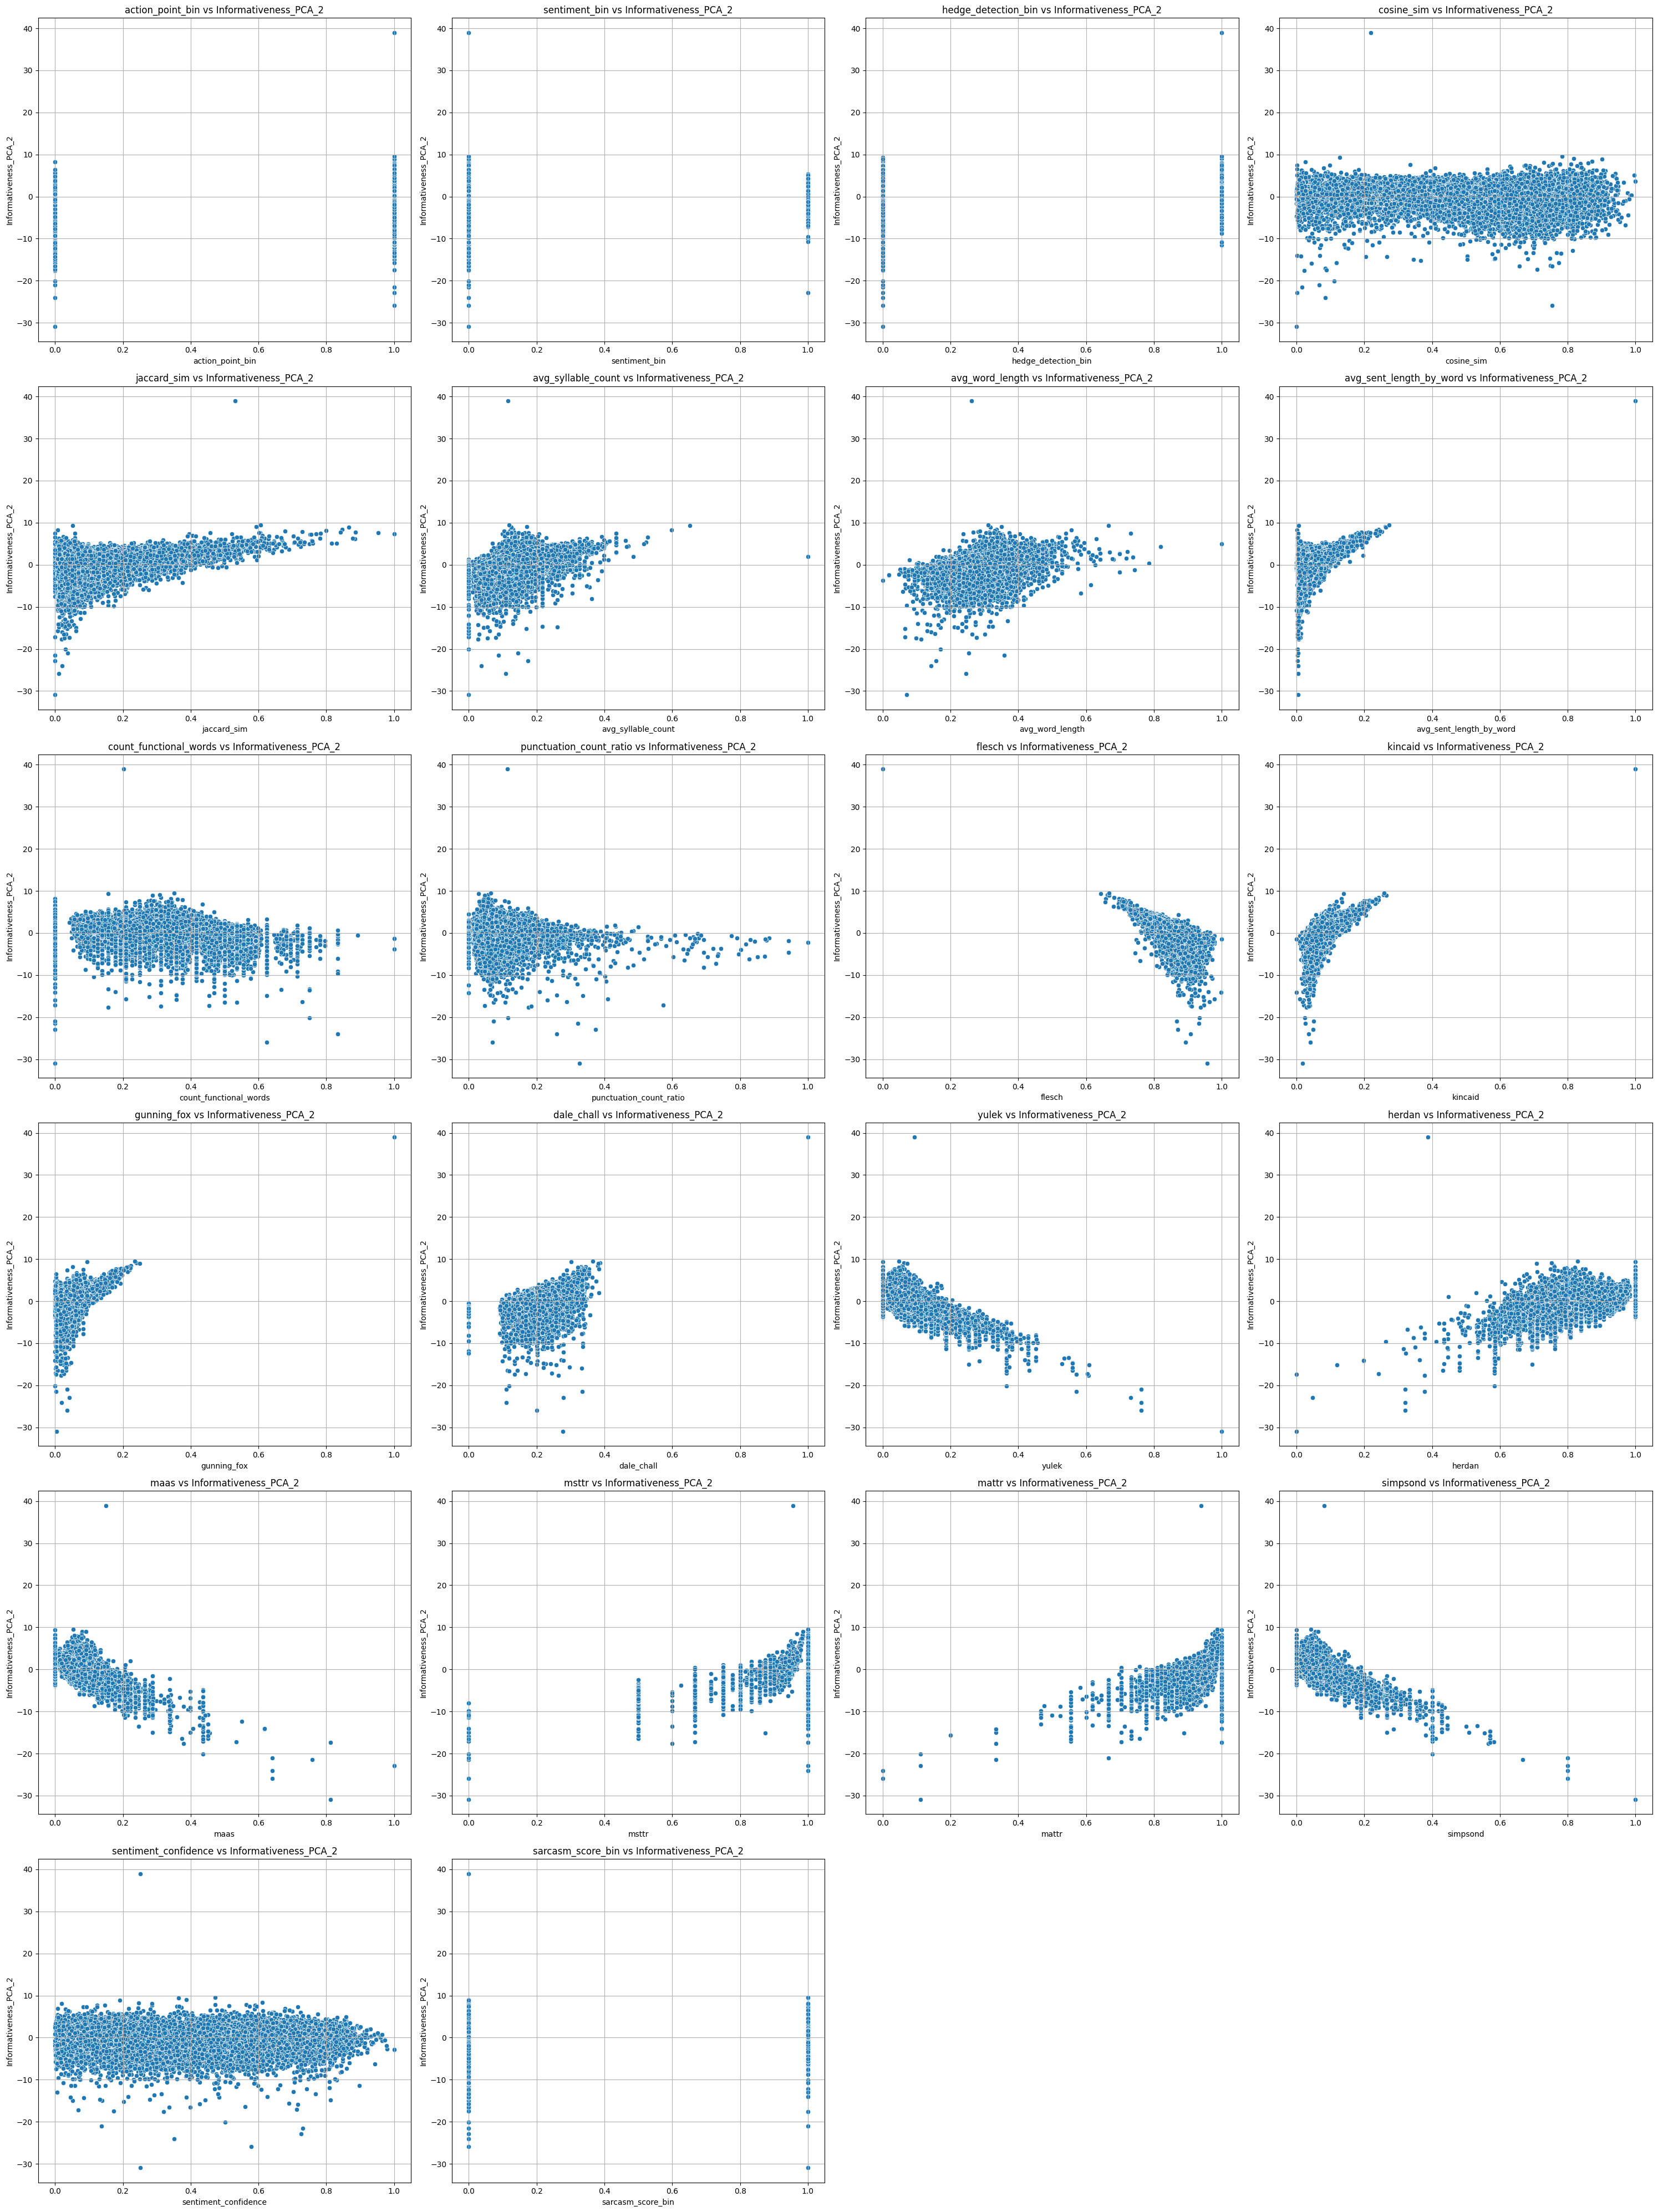

In [21]:
plt.figure(figsize=(30, 40))  # Adjust size for better visualization
for idx, feature in enumerate(features):
    plt.subplot(6, 4, idx + 1)  # 11 rows, 2 columns grid
    sns.scatterplot(data=df, x=feature, y=targets[1])
    plt.title(f'{feature} vs {targets[1]}')
    plt.xlabel(feature)
    plt.ylabel(targets[1])
    plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
target = targets[2]
plt.figure(figsize=(30, 40))  # Adjust size for better visualization
for idx, feature in enumerate(features):
    plt.subplot(6, 4, idx + 1)  # 11 rows, 2 columns grid
    sns.scatterplot(data=df, x=feature, y=target)
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.grid(True)
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

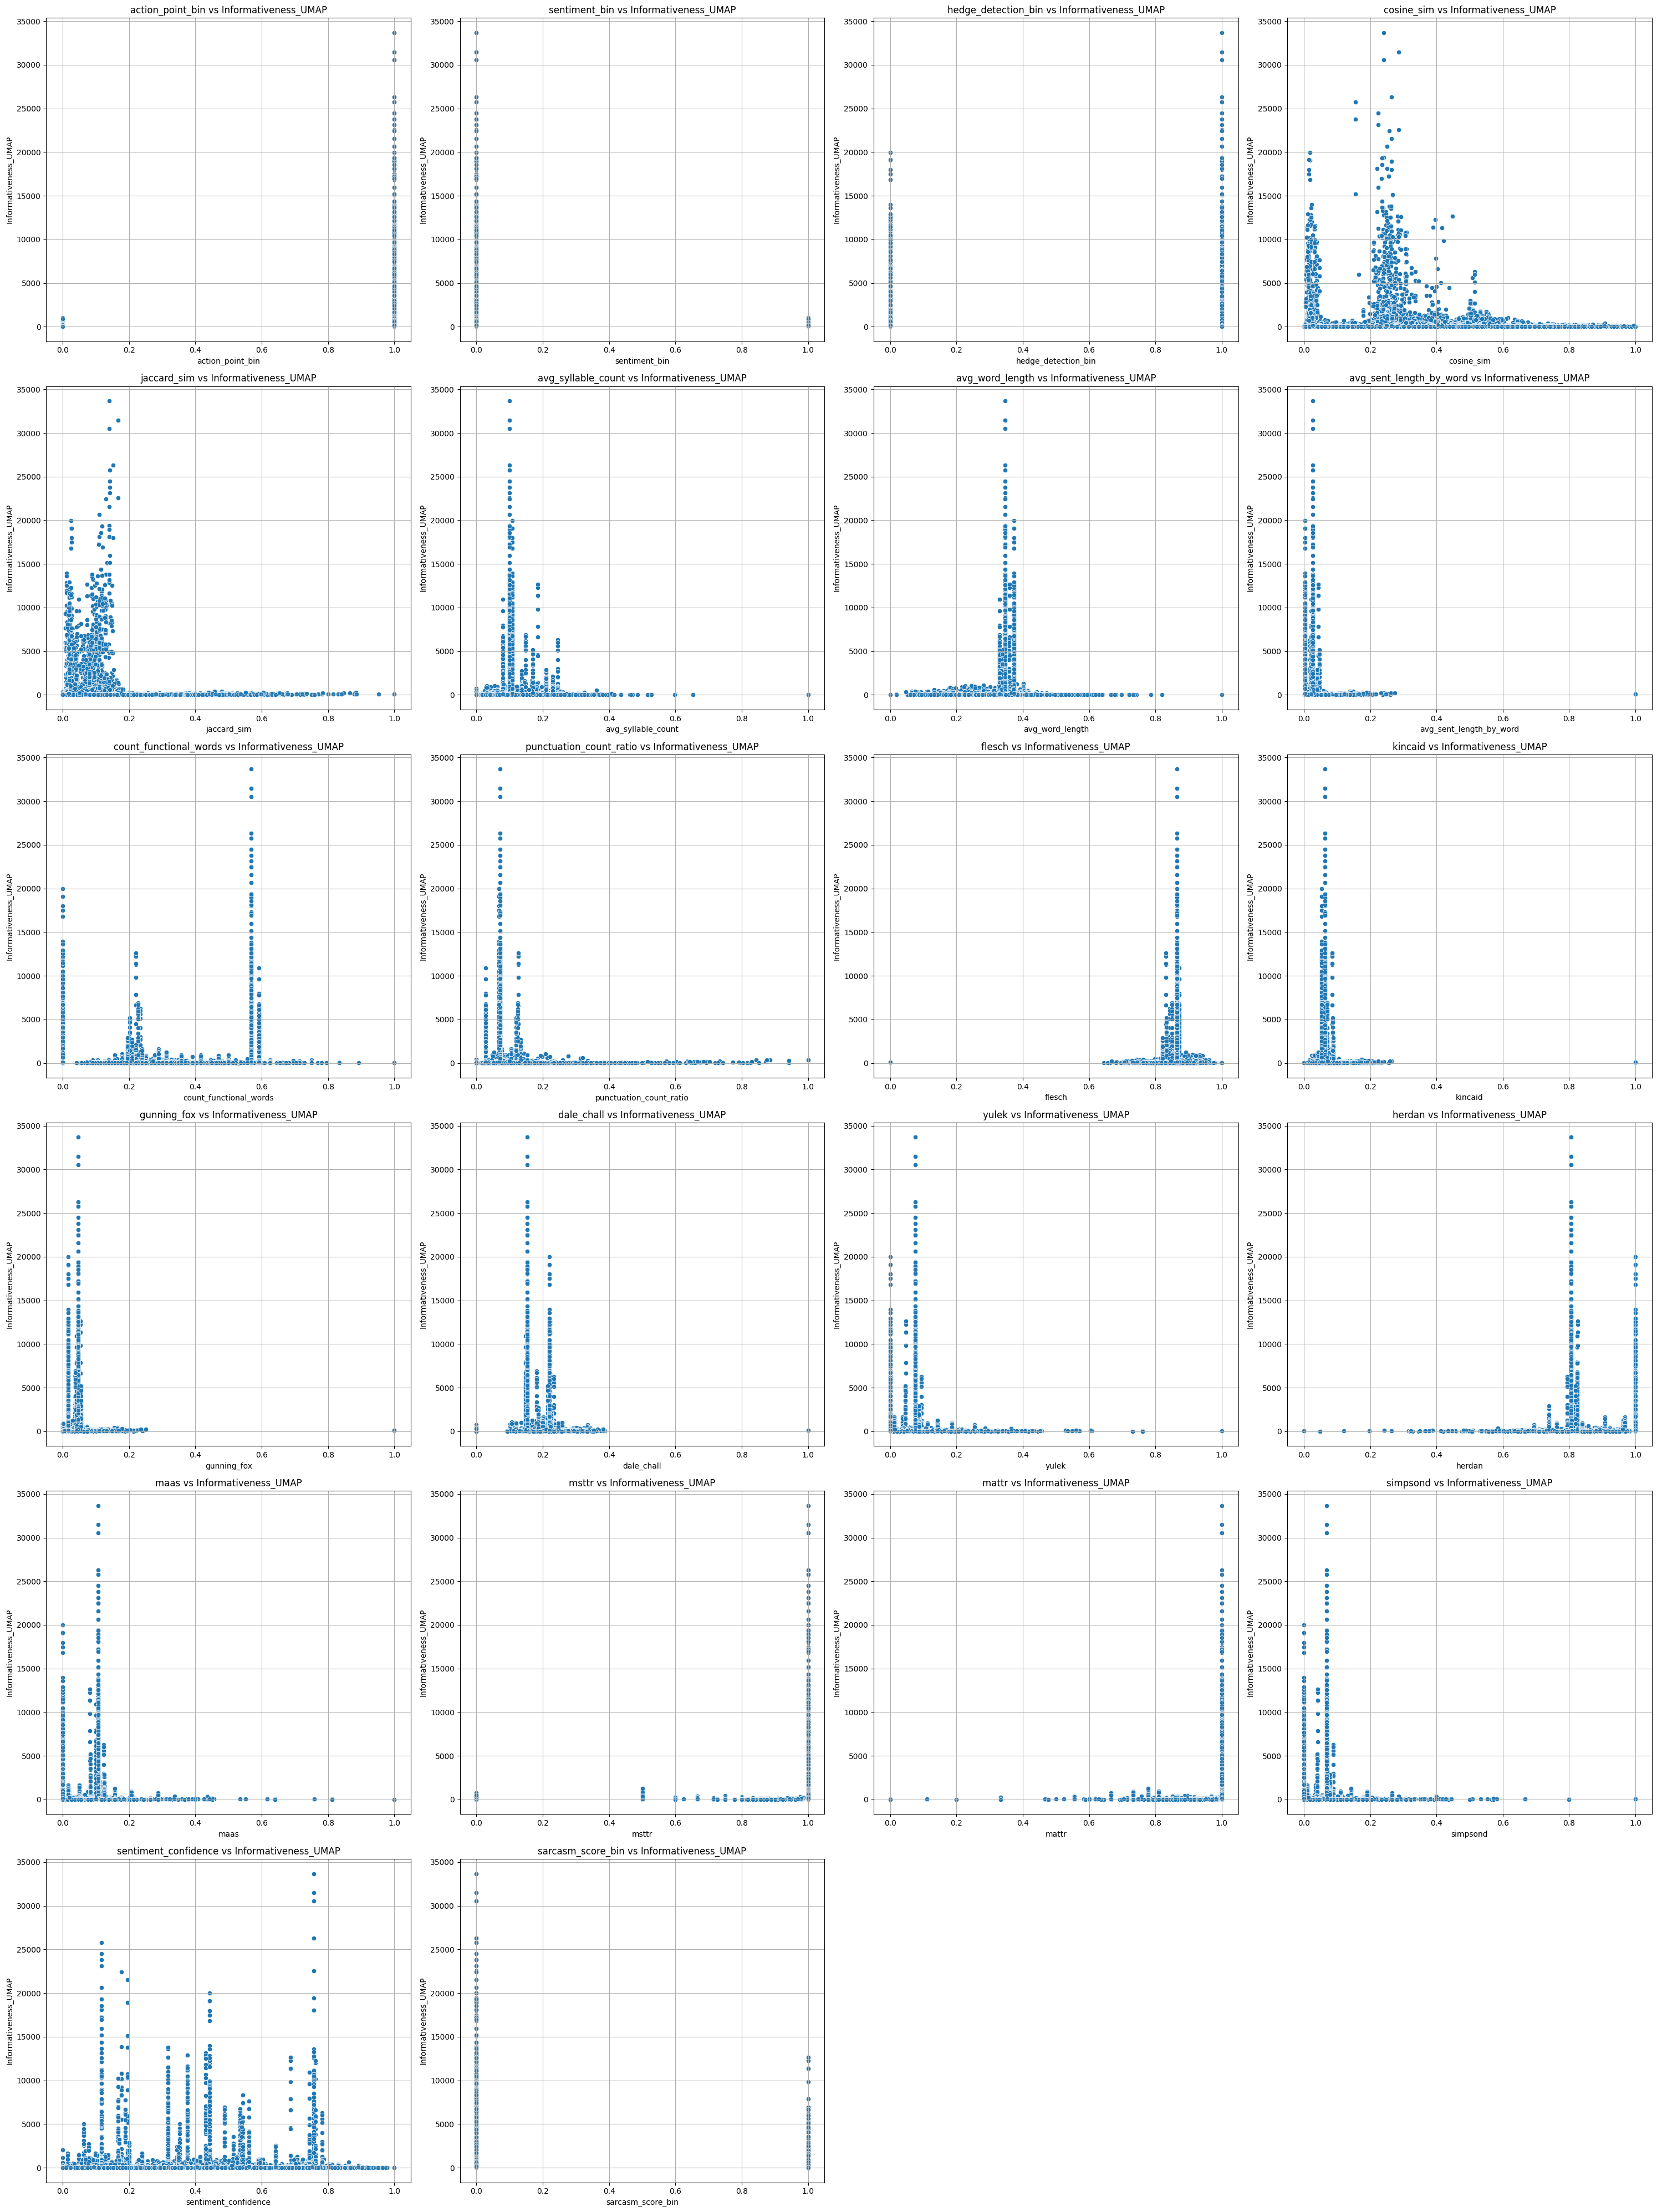

In [23]:
target = targets[3]
plt.figure(figsize=(30, 40))  # Adjust size for better visualization
for idx, feature in enumerate(features):
    plt.subplot(6, 4, idx + 1)  # 11 rows, 2 columns grid
    sns.scatterplot(data=df, x=feature, y=target)
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
target = targets[4]
plt.figure(figsize=(30, 40))  # Adjust size for better visualization
for idx, feature in enumerate(features):
    plt.subplot(6, 4, idx + 1)  # 11 rows, 2 columns grid
    sns.scatterplot(data=df, x=feature, y=target)
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.grid(True)
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

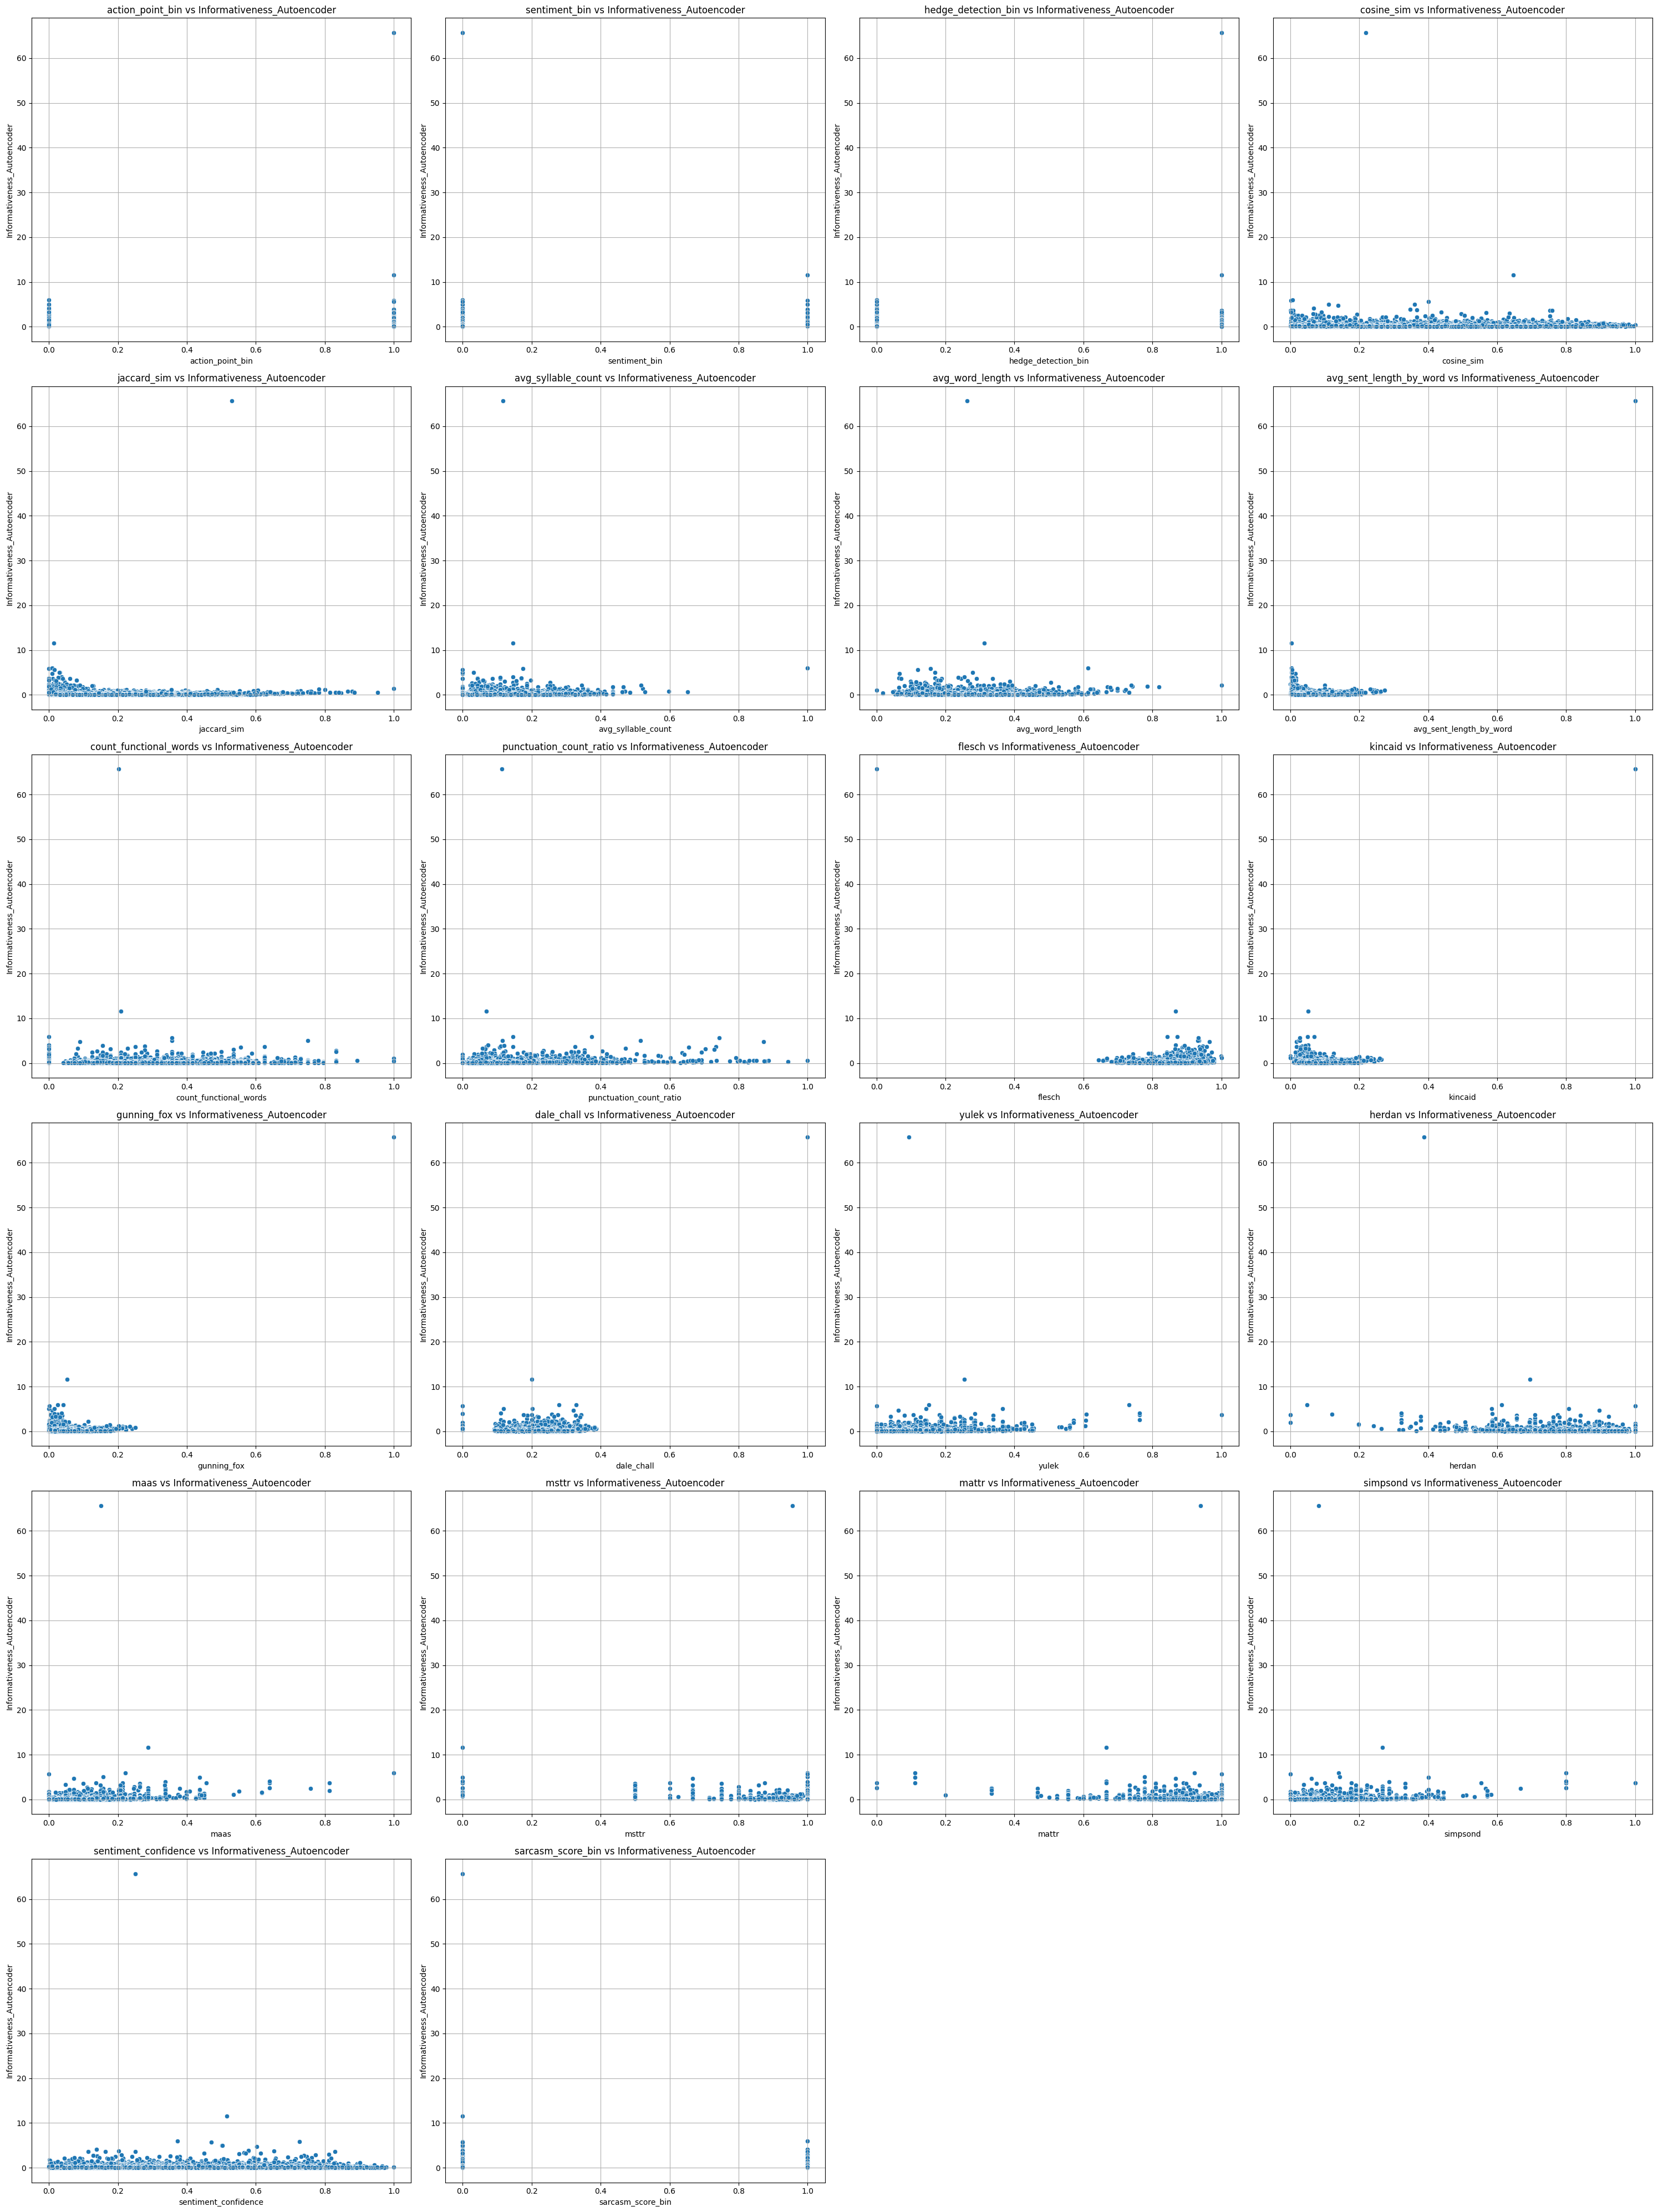

In [25]:
target = targets[5]
plt.figure(figsize=(30, 40))  # Adjust size for better visualization
for idx, feature in enumerate(features):
    plt.subplot(6, 4, idx + 1)  # 11 rows, 2 columns grid
    sns.scatterplot(data=df, x=feature, y=target)
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.grid(True)
plt.tight_layout()
plt.show()